# LAB9 - Unsupervised Learning - PCA


**PCA represents new dimensions that capture the most variance in your original dataset, enabling dimensionality reduction while retaining important information.**

- [1: Principal Component Analysis](#1:-Principal-Component-Analysis)
- [2:  NCI60 Data Example](#2:-NCI60-Data-Example)

In [97]:
# %load ../standard_import.txt
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import scale
from sklearn.decomposition import PCA


%matplotlib inline
# plt.style.use('seaborn-white')

##  1: Principal Component Analysis

The rows of the data set contain the 50 states, in
alphabetical order
The columns of the data set contain the four variables.

In [101]:
df = pd.read_csv('USArrests.csv', index_col=0) # each row will be labeled with the corresponding state name
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


We first brifey examine the data. We notice that the variables have vastly different means.

In [104]:
df.mean()

Murder        7.788
Assault     170.760
UrbanPop     65.540
Rape         21.232
dtype: float64

 We see that there are on average three times as many
rapes as murders, and more than eight times as many assaults as rapes

We can also examine the variances of the four variables

In [108]:
df.var()

Murder        18.970465
Assault     6945.165714
UrbanPop     209.518776
Rape          87.729159
dtype: float64

Not surprisingly, the variables also have vastly different variances: the UrbanPop variable measures the percentage of the population in each state living in an urban area, which is not a comparable number to the number
of rapes in each state per 100,000 individuals. 

If we failed to scale the variables before performing PCA, then most of the principal components that we observed would be driven by the Assault variable, since it has by far the largest mean and variance. 

Thus, it is important to standardize the variables to have mean zero and standard deviation one before performing PCA.

In [111]:
X = pd.DataFrame(scale(df), index=df.index, columns=df.columns)
X.head()

Murder   Assault  UrbanPop      Rape
Alabama     1.255179  0.790787 -0.526195 -0.003451
Alaska      0.513019  1.118060 -1.224067  2.509424
Arizona     0.072361  1.493817  1.009122  1.053466
Arkansas    0.234708  0.233212 -1.084492 -0.186794
California  0.281093  1.275635  1.776781  2.088814

We now perform principal components analysis

In [114]:
pca1=PCA().fit(X)

**Shape of pca components is (n_components, n_features) where n_componentsis the min minimum of the number of samples and features**

Show the principal component loadings; each column contains the corresponding principal component loading vector

In [118]:
# The loading vectors
pca_loadings = pd.DataFrame(pca1.components_.T, index=df.columns, columns=['V1', 'V2', 'V3', 'V4'])
pca_loadings

V1        V2        V3        V4
Murder    0.535899  0.418181 -0.341233  0.649228
Assault   0.583184  0.187986 -0.268148 -0.743407
UrbanPop  0.278191 -0.872806 -0.378016  0.133878
Rape      0.543432 -0.167319  0.817778  0.089024

**V1 has 0.536 which indicates it contributes significantly to Murder.** higher value means higher importance

**V2 has inverse relationship with Murder**

We see that there are four distinct principal components. This is to be expected because there are in general min(n − 1; p) informative principal components in a data set with n observations and p variables.

In [122]:
X.shape

(50, 4)

In [124]:
# Fit the PCA model and transform X to get the principal components
pca = PCA()
df_plot = pd.DataFrame(pca.fit_transform(X), columns=['PC1', 'PC2', 'PC3', 'PC4'], index=X.index)
df_plot

PC1       PC2       PC3       PC4
Alabama         0.985566  1.133392 -0.444269  0.156267
Alaska          1.950138  1.073213  2.040003 -0.438583
Arizona         1.763164 -0.745957  0.054781 -0.834653
Arkansas       -0.141420  1.119797  0.114574 -0.182811
California      2.523980 -1.542934  0.598557 -0.341996
Colorado        1.514563 -0.987555  1.095007  0.001465
Connecticut    -1.358647 -1.088928 -0.643258 -0.118469
Delaware        0.047709 -0.325359 -0.718633 -0.881978
Florida         3.013042  0.039229 -0.576829 -0.096285
Georgia         1.639283  1.278942 -0.342460  1.076797
Hawaii         -0.912657 -1.570460  0.050782  0.902807
Idaho          -1.639800  0.210973  0.259801 -0.499104
Illinois        1.378911 -0.681841 -0.677496 -0.122021
Indiana        -0.505461 -0.151563  0.228055  0.424666
Iowa           -2.253646 -0.104054  0.164564  0.017556
Kansas         -0.796881 -0.270165  0.025553  0.206496
Kentucky       -0.750859  0.958440 -0.028369  0.670557
Louisiana       1.564818  0.871055 -0.783480  0.454728
Maine          -2.396829  0.376392 -0.065682 -0.330460
Maryland        1.763369  0.427655 -0.157250 -0.559070
Massachusetts  -0.486166 -1.474496 -0.609497 -0.179599
Michigan        2.108441 -0.155397  0.384869  0.102372
Minnesota      -1.692682 -0.632261  0.153070  0.067317
Mississippi     0.996494  2.393796 -0.740808  0.215508
Missouri        0.696787 -0.263355  0.377444  0.225824
Montana        -1.185452  0.536874  0.246889  0.123742
Nebraska       -1.265637 -0.193954  0.175574  0.015893
Nevada          2.874395 -0.775600  1.163380  0.314515
New Hampshire  -2.383915 -0.018082  0.036855 -0.033137
New Jersey      0.181566 -1.449506 -0.764454  0.243383
New Mexico      1.980024  0.142849  0.183692 -0.339534
New York        1.682577 -0.823184 -0.643075 -0.013484
North Carolina  1.123379  2.228003 -0.863572 -0.954382
North Dakota   -2.992226  0.599119  0.301277 -0.253987
Ohio           -0.225965 -0.742238 -0.031139  0.473916
Oklahoma       -0.311783 -0.287854 -0.015310  0.010332
Oregon          0.059122 -0.541411  0.939833 -0.237781
Pennsylvania   -0.888416 -0.571100 -0.400629  0.359061
Rhode Island   -0.863772 -1.491978 -1.369946 -0.613569
South Carolina  1.320724  1.933405 -0.300538 -0.131467
South Dakota   -1.987775  0.823343  0.389293 -0.109572
Tennessee       0.999742  0.860251  0.188083  0.652864
Texas           1.355138 -0.412481 -0.492069  0.643195
Utah           -0.550565 -1.471505  0.293728 -0.082314
Vermont        -2.801412  1.402288  0.841263 -0.144890
Virginia       -0.096335  0.199735  0.011713  0.211371
Washington     -0.216903 -0.970124  0.624871 -0.220848
West Virginia  -2.108585  1.424847  0.104775  0.131909
Wisconsin      -2.079714 -0.611269 -0.138865  0.184104
Wyoming        -0.629427  0.321013 -0.240659 -0.166652

We can plot the first two principal components as follows:

C:\Users\4311779\AppData\Local\Temp\ipykernel_10532\1119103770.py:31: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax2.arrow(0,0,pca_loadings.V1[0], -pca_loadings.V2[0])
C:\Users\4311779\AppData\Local\Temp\ipykernel_10532\1119103770.py:32: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax2.arrow(0,0,pca_loadings.V1[1], -pca_loadings.V2[1])
C:\Users\4311779\AppData\Local\Temp\ipykernel_10532\1119103770.py:33: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, 

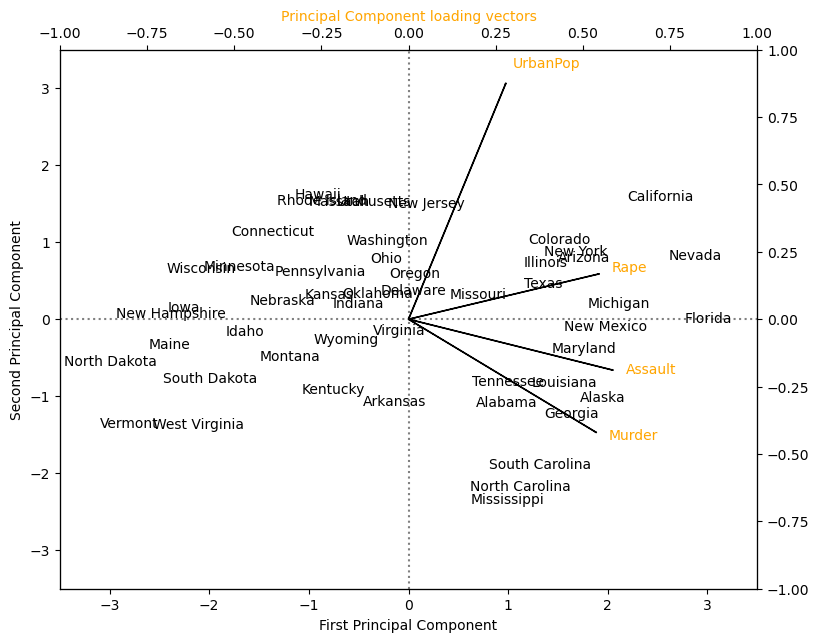

In [127]:
fig , ax1 = plt.subplots(figsize=(9,7))

ax1.set_xlim(-3.5,3.5)
ax1.set_ylim(-3.5,3.5)

# Plot Principal Components 1 and 2
for i in df_plot.index:
    ax1.annotate(i, (df_plot.PC1.loc[i], -df_plot.PC2.loc[i]), ha='center')

# Plot reference lines
ax1.hlines(0,-3.5,3.5, linestyles='dotted', colors='grey')
ax1.vlines(0,-3.5,3.5, linestyles='dotted', colors='grey')

ax1.set_xlabel('First Principal Component')
ax1.set_ylabel('Second Principal Component')
    
# Plot Principal Component loading vectors, using a second y-axis.
ax2 = ax1.twinx().twiny() 

ax2.set_ylim(-1,1)
ax2.set_xlim(-1,1)
ax2.tick_params(axis='y', colors='orange')
ax2.set_xlabel('Principal Component loading vectors', color='orange')

# Plot labels for vectors. Variable 'a' is a small offset parameter to separate arrow tip and text.
a = 1.07  
for i in pca_loadings[['V1', 'V2']].index:
    ax2.annotate(i, (pca_loadings.V1.loc[i]*a, -pca_loadings.V2.loc[i]*a), color='orange')

# Plot vectors
ax2.arrow(0,0,pca_loadings.V1[0], -pca_loadings.V2[0])
ax2.arrow(0,0,pca_loadings.V1[1], -pca_loadings.V2[1])
ax2.arrow(0,0,pca_loadings.V1[2], -pca_loadings.V2[2])
ax2.arrow(0,0,pca_loadings.V1[3], -pca_loadings.V2[3])
plt.show()

In [128]:
# Standard deviation of the four principal components
np.sqrt(pca.explained_variance_)

array([1.5908673 , 1.00496987, 0.6031915 , 0.4206774 ])

In [131]:
pca.explained_variance_

array([2.53085875, 1.00996444, 0.36383998, 0.17696948])

In [133]:
pca.explained_variance_ratio_

array([0.62006039, 0.24744129, 0.0891408 , 0.04335752])

We see that the first principal component explains 62.0% of the variance in the data, the next principal component explains 24.7% of the variance, and so forth.

We can plot the Proportion of Variance Explained PVE explained by each component, as well as the cumulative PVE, as follows:

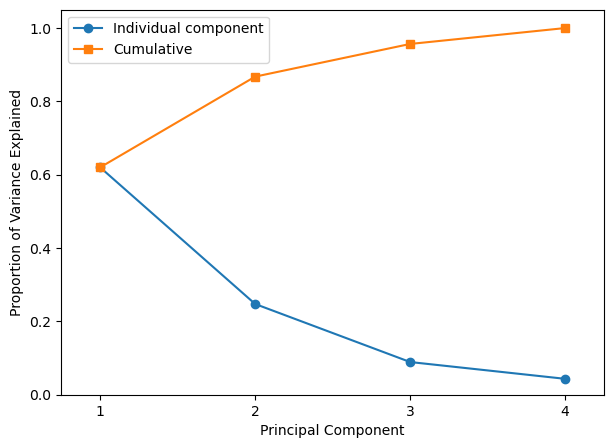

In [137]:
plt.figure(figsize=(7,5))

plt.plot([1,2,3,4], pca.explained_variance_ratio_, '-o', label='Individual component')
plt.plot([1,2,3,4], np.cumsum(pca.explained_variance_ratio_), '-s', label='Cumulative')

plt.ylabel('Proportion of Variance Explained')
plt.xlabel('Principal Component')
plt.xlim(0.75,4.25)
plt.ylim(0,1.05)
plt.xticks([1,2,3,4])
plt.legend(loc=2);
plt.show()

## 2: NCI60 Data Example

### PCA
Apply PCA one the attached NC160 dataset
similar to what we did in the lab


In [141]:
NCI = pd.read_csv("cancer_X.csv", index_col=0)
NCI.head()

1         2         3         4         5             6         7  \
V1  0.300000  1.180000  0.550000  1.140000 -0.265000 -7.000000e-02  0.350000   
V2  0.679961  1.289961  0.169961  0.379961  0.464961  5.799610e-01  0.699961   
V3  0.940000 -0.040000 -0.170000 -0.040000 -0.605000  0.000000e+00  0.090000   
V4  0.280000 -0.310000  0.680000 -0.810000  0.625000 -1.387779e-17  0.170000   
V5  0.485000 -0.465000  0.395000  0.905000  0.200000 -5.000000e-03  0.085000   

           8         9        10  ...      6821      6822      6823      6824  \
V1 -0.315000 -0.450000 -0.654980  ... -0.990020  0.000000  0.030000 -0.175000   
V2  0.724961 -0.040039 -0.285019  ... -0.270058 -0.300039 -0.250039 -0.535039   
V3  0.645000  0.430000  0.475019  ...  0.319981  0.120000 -0.740000 -0.595000   
V4  0.245000  0.020000  0.095019  ... -1.240020 -0.110000 -0.160000  0.095000   
V5  0.110000  0.235000  1.490019  ...  0.554980 -0.775000 -0.515000 -0.320000   

        6825      6826      6827      6828      6829      6830  
V1  0.629981 -0.030000  0.000000  0.280000 -0.340000 -1.930000  
V2  0.109941 -0.860039 -1.250049 -0.770039 -0.390039 -2.000039  
V3 -0.270020 -0.150000  0.000000 -0.120000 -0.410000  0.000000  
V4 -0.350019 -0.300000 -1.150010  1.090000 -0.260000 -1.100000  
V5  0.634980  0.605000  0.000000  0.745000  0.425000  0.145000  

[5 rows x 6830 columns]

In [143]:
X = pd.DataFrame(scale(NCI), index=NCI.index, columns=NCI.columns)
X.head()

1         2         3         4         5         6         7  \
V1  0.728671  1.607220  1.325688  1.355688 -0.604845 -0.220654  0.898137   
V2  1.596418  1.753544  0.441686  0.654119  0.911898  1.648748  1.849697   
V3  2.190290 -0.016217 -0.349092  0.266465 -1.311310 -0.019322  0.191185   
V4  0.682995 -0.375502  1.628079 -0.444299  1.244434 -0.019322  0.408709   
V5  1.151170 -0.581759  0.965145  1.138767  0.361351 -0.033703  0.177590   

           8         9        10  ...      6821      6822      6823      6824  \
V1 -0.868741 -1.058612 -1.059174  ... -1.030663 -0.358518 -0.238245 -0.392487   
V2  2.226625 -0.095860 -0.477977  ... -0.215657 -0.625720 -0.489938 -0.800791   
V3  1.988627  1.007979  0.716019  ...  0.452274 -0.251651 -0.930304 -0.868790   
V4  0.798057  0.045135  0.119051  ... -1.313667 -0.456479 -0.409013 -0.086293   
V5  0.396239  0.550041  2.310550  ...  0.718297 -1.048700 -0.728079 -0.556925   

        6825      6826      6827      6828      6829      6830  
V1  0.831370 -0.200286 -0.075668  0.520893 -0.836365 -1.384675  
V2  0.013818 -1.105413 -1.117676 -0.823652 -0.925425 -1.431446  
V3 -0.583517 -0.331142 -0.075668  0.008704 -0.960951 -0.095838  
V4 -0.709285 -0.494711 -1.034286  1.558075 -0.693981 -0.830408  
V5  0.839231  0.492157 -0.075668  1.116312  0.525182  0.000992  

[5 rows x 6830 columns]

In [85]:
pca = PCA().fit(X)

In [89]:
column_names = [f'V{i}' for i in range(1, 65)]

pca_loadings = pd.DataFrame(pca.components_.T, index=NCI.columns, columns=column_names)
pca_loadings

V1        V2        V3        V4        V5        V6        V7  \
1    -0.010682 -0.001324  0.008504  0.003524  0.010127  0.028904 -0.007825   
2    -0.002312 -0.001675  0.010257 -0.002604  0.011401  0.011243 -0.001883   
3    -0.005880  0.006289  0.010055  0.010681 -0.010265  0.018449  0.007331   
4     0.003278 -0.002666  0.008362  0.007476 -0.011248  0.005553  0.003868   
5    -0.007678  0.002508  0.013821 -0.009509 -0.004095 -0.002732 -0.003956   
...        ...       ...       ...       ...       ...       ...       ...   
6826  0.001203 -0.001711  0.007418 -0.007996  0.010364 -0.006300  0.015907   
6827  0.002026 -0.006324  0.006350 -0.010467 -0.005074  0.001837  0.016101   
6828 -0.001971 -0.009371  0.010498  0.015003  0.015948 -0.003948  0.018290   
6829  0.007791 -0.002315  0.020134  0.003265 -0.002017 -0.006773  0.020461   
6830  0.007715  0.003544  0.018158  0.005444 -0.008390 -0.005311  0.009006   

            V8        V9       V10  ...       V55       V56       V57  \
1     0.002031 -0.002196 -0.011170  ...  0.016244  0.010247  0.006011   
2    -0.002363  0.006247 -0.036962  ... -0.008803 -0.024358 -0.000664   
3     0.002453  0.000602 -0.021233  ...  0.008753 -0.015551  0.001208   
4     0.021101  0.030432 -0.021462  ... -0.004724 -0.000684  0.030800   
5    -0.001172  0.021524 -0.011597  ... -0.018691  0.011797 -0.013944   
...        ...       ...       ...  ...       ...       ...       ...   
6826 -0.003423 -0.013631  0.000104  ... -0.007517  0.015263  0.030735   
6827  0.001000 -0.001343 -0.002735  ... -0.004668  0.031292  0.024499   
6828  0.000538 -0.000864  0.006919  ...  0.002118 -0.005628 -0.001675   
6829  0.007717 -0.008258  0.004062  ... -0.000417 -0.007372 -0.008233   
6830 -0.005804  0.002124  0.012387  ... -0.021378 -0.023189 -0.006991   

           V58       V59       V60       V61       V62       V63       V64  
1    -0.013622 -0.015296 -0.018262 -0.004904  0.023377  0.011315 -0.139797  
2    -0.048253 -0.011908  0.002407 -0.024046 -0.002470 -0.023539  0.000311  
3    -0.000879  0.021068 -0.019716 -0.023800  0.012167  0.021605  0.123871  
4     0.011786  0.003608 -0.003556 -0.010970  0.002484  0.011701 -0.130996  
5    -0.013633  0.018619  0.000059  0.002598 -0.000827 -0.006699 -0.191327  
...        ...       ...       ...       ...       ...       ...       ...  
6826  0.008551  0.027713 -0.024365 -0.006994 -0.006431  0.026909  0.013473  
6827 -0.013236  0.014032  0.002430 -0.000645 -0.020105 -0.015280 -0.006844  
6828  0.022829 -0.006351 -0.005502 -0.003920  0.000405  0.005598 -0.003044  
6829  0.018121  0.001606  0.011602  0.008802  0.000679 -0.007809  0.006294  
6830  0.003264  0.001411 -0.003261 -0.000637 -0.015931 -0.020657 -0.007179  

[6830 rows x 64 columns]

In [91]:
X.shape

(64, 6830)

In [145]:
pca = PCA()
NCI_plot = pd.DataFrame(pca.fit_transform(X), columns=[f'PC{i}' for i in range(1, 65)], index=X.index)
NCI_plot

PC1        PC2        PC3        PC4        PC5        PC6  \
V1  -19.838042  -3.555636  -9.812399  -0.824246  12.609984   7.471505   
V2  -23.089215  -6.441460 -13.478251   5.635308   8.035496   3.715178   
V3  -27.456114  -2.465143  -3.533054  -1.341673  12.564846  17.344925   
V4  -42.816801   9.768358  -0.890073   3.445043  42.269904  27.238815   
V5  -55.418530   5.198897 -21.094558  15.849712  10.443273  12.991051   
..         ...        ...        ...        ...        ...        ...   
V60 -17.996242  47.242414   5.398941 -17.405145  -0.293594  -7.429801   
V61  -4.415510  42.309563   8.715183  -2.805833   5.716318  -3.375639   
V62 -22.966988  36.102038  18.116579  -7.579957   5.874271   0.570517   
V63 -19.176007  50.398441   4.211153  -3.041732  -8.347417  -3.660122   
V64 -13.232870  35.125249   3.433554  -2.174010  -1.001003  -4.971377   

           PC7        PC8        PC9       PC10  ...      PC55       PC56  \
V1   14.190730  -3.197977  21.938350 -20.369363  ... -3.571612 -11.111674   
V2   10.143225  -7.292724  22.338284 -13.119764  ...  3.378131   5.232259   
V3   10.354857  -2.671282  -0.234926  -6.357967  ...  1.299500   5.323021   
V4   17.520642  -0.554341  14.264354  15.969204  ... -0.342635  -1.117879   
V5   12.597895  32.513096  -7.896805 -10.177263  ... -0.264565  -2.311955   
..         ...        ...        ...        ...  ...       ...        ...   
V60 -15.572290  22.270195  -2.897352  22.387769  ... -0.799871 -12.253771   
V61 -11.918083   6.707284   1.845688   3.411293  ... -9.943943  13.037002   
V62  -7.703801  -5.585683  -5.160482  13.450721  ... -9.992050   2.294835   
V63  -2.023234  11.885016  -4.124961 -12.922132  ...  4.893907   1.925993   
V64 -10.267870   3.626666  -2.299100  14.867439  ...  4.845999   1.417117   

         PC57      PC58      PC59      PC60      PC61      PC62      PC63  \
V1   6.336264  9.077897 -3.892561 -3.240788  0.446627  0.392266 -0.894904   
V2  -6.325341 -7.665590  3.938798  4.018298 -0.617127 -0.776330  0.969009   
V3  -4.867172 -0.044978  2.027836 -1.089818 -1.695444  0.498405 -0.844418   
V4   2.511719  6.390061 -3.429572 -0.705737 -1.372244  1.427329  0.735637   
V5   2.926478 -1.870319  2.295689  0.614378  2.577214 -0.557610 -0.576024   
..        ...       ...       ...       ...       ...       ...       ...   
V60  5.017202  8.529950  4.263580 -3.510030 -3.253202  1.358311 -0.379709   
V61  5.703453 -9.154761 -3.763392  3.066959  1.931465 -0.929279 -0.469700   
V62 -4.471902  3.623403 -1.155455  0.069896  0.090374 -0.337372 -0.268801   
V63 -2.909624 -1.026299 -5.466240  1.499262 -0.317515 -1.515080  1.011507   
V64 -2.597536 -0.079785  0.211567  1.307060  0.635823  0.592331 -0.670834   

             PC64  
V1   1.236942e-14  
V2   1.236942e-14  
V3   1.236942e-14  
V4   1.236942e-14  
V5   1.236942e-14  
..            ...  
V60  1.236942e-14  
V61  1.236942e-14  
V62  1.236942e-14  
V63  1.236942e-14  
V64  1.236942e-14  

[64 rows x 64 columns]

In [147]:
pca.explained_variance_ratio_

array([1.13589419e-01, 6.75620253e-02, 5.75184223e-02, 4.24755448e-02,
       3.73497235e-02, 3.61863019e-02, 3.06622240e-02, 2.68590309e-02,
       2.52949807e-02, 2.37586884e-02, 2.35655815e-02, 2.16412198e-02,
       2.04909747e-02, 1.97881793e-02, 1.91541737e-02, 1.77176082e-02,
       1.66272971e-02, 1.61075898e-02, 1.59433320e-02, 1.55991861e-02,
       1.50721674e-02, 1.48009892e-02, 1.43576234e-02, 1.36277104e-02,
       1.32350200e-02, 1.27519917e-02, 1.25903703e-02, 1.20979413e-02,
       1.18098781e-02, 1.12098170e-02, 1.08277440e-02, 1.04477523e-02,
       1.02647051e-02, 9.88274535e-03, 9.74257138e-03, 9.31114503e-03,
       9.14795316e-03, 8.95640894e-03, 8.72950586e-03, 8.42575751e-03,
       8.13979814e-03, 7.89749805e-03, 7.39000998e-03, 7.20101586e-03,
       7.08918353e-03, 6.90272334e-03, 6.78495251e-03, 6.47012955e-03,
       6.40883777e-03, 6.01193511e-03, 5.66418607e-03, 5.63402788e-03,
       5.38935217e-03, 5.12786334e-03, 5.11796180e-03, 4.81620125e-03,
      